<a href="https://colab.research.google.com/github/lhbsaldana/Data-Science-Projects/blob/main/%5BTM%5D_Code_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing necessary libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Importing dataset

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
directory = "/content/drive/MyDrive/Colab Notebooks/" 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv(directory+"povstat_processed.csv")

In [ ]:
dataset.shape

(3605, 8)

The dataset consists of 3605 records and 8 columns 

Show the first 5 rows of the dataset

In [ ]:
dataset.head()

,Unnamed: 0,Variable,Year,province,value,adm_level,region,unit
0,0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
1,1,Annual Per Capita Poverty Threshold (in Pesos),2006,1st District,"15,699",District,NCR,in Pesos
2,2,Annual Per Capita Poverty Threshold (in Pesos),2009,1st District,"19,227",District,NCR,in Pesos
3,3,Annual Per Capita Poverty Threshold (in Pesos),2012,1st District,"20,344",District,NCR,in Pesos
4,4,Annual Per Capita Poverty Threshold (in Pesos),2015,1st District,"25,007",District,NCR,in Pesos


Remove the unnecessary column since the dataframe already has deafult indices.

In [ ]:
dataset = dataset.drop('Unnamed: 0',axis='columns')

In [ ]:
dataset.head()

,Variable,Year,province,value,adm_level,region,unit
0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
1,Annual Per Capita Poverty Threshold (in Pesos),2006,1st District,"15,699",District,NCR,in Pesos
2,Annual Per Capita Poverty Threshold (in Pesos),2009,1st District,"19,227",District,NCR,in Pesos
3,Annual Per Capita Poverty Threshold (in Pesos),2012,1st District,"20,344",District,NCR,in Pesos
4,Annual Per Capita Poverty Threshold (in Pesos),2015,1st District,"25,007",District,NCR,in Pesos


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Variable   3605 non-null   object
 1   Year       3605 non-null   int64 
 2   province   3605 non-null   object
 3   value      3010 non-null   object
 4   adm_level  3360 non-null   object
 5   region     3360 non-null   object
 6   unit       3605 non-null   object
dtypes: int64(1), object(6)
memory usage: 197.3+ KB


###Count null values in the dataset 

In [ ]:
dataset.isna().sum()

Variable       0
Year           0
province       0
value        595
adm_level    245
region       245
unit           0
dtype: int64

There are 595 null values for the *value* column, and 245 for the *adm_level* and *region* columns respectively. The value column has the largest number of null values so we will handle that first. 

##Handling Missing Data 

###Value Column 

In [ ]:
df = dataset[dataset['value'].isnull()]
df

,Variable,Year,province,value,adm_level,region,unit
0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
5,Poverty Incidence among Families (%),1991,1st District,NaN,District,NCR,%
10,Magnitude of Poor Families,1991,1st District,NaN,District,NCR,families
15,Poverty Incidence among Population (%),1991,1st District,NaN,District,NCR,%
20,Magnitude of Poor Population,1991,1st District,NaN,District,NCR,population
...,...,...,...,...,...,...,...
3580,Magnitude of Poor Families,1991,Zamboanga del Sur,NaN,Province,Region IX,families
3585,Poverty Incidence among Population (%),1991,Zamboanga del Sur,NaN,Province,Region IX,%
3590,Magnitude of Poor Population,1991,Zamboanga del Sur,NaN,Province,Region IX,population
3595,Subsistence Incidence among Population (%),1991,Zamboanga del Sur,NaN,Province,Region IX,%


Let us count the number of rows with null values in the value column by year. 

In [ ]:
df = dataset[dataset['value'].isnull()]
df1 = df['Year'].value_counts()
print(df1)

1991    595
Name: Year, dtype: int64


In [ ]:
dataset['Year'].value_counts()

1991    721
2006    721
2009    721
2012    721
2015    721
Name: Year, dtype: int64

Only the year 1991 has null values in the value column, accounting for 595 records. This leaves 126 rows  with complete data for year 1991. Hence, we can remove all rows for year 1991 since more than half of the rows have incomplete data. We can also assume that the observations are missing completely at random due to unavailability of digital storage during that year. 


In [ ]:
dataset = dataset.drop(dataset.loc[dataset['Year']==1991].index)

In [ ]:
dataset.shape

(2884, 7)

The number of rows is down to 3010 from 3605 after deleting records from year 1991. 





###Administrative level and region columns

In [ ]:
dataset.isnull().sum()

Variable       0
Year           0
province       0
value          0
adm_level    196
region       196
unit           0
dtype: int64

In [ ]:
dataset['adm_level'].unique()

array(['District', 'Region', 'Province', nan, 'Country'], dtype=object)

In [ ]:
dataset['region'].unique()

array(['NCR', 'ARMM', 'CAR', 'CARAGA', 'Region VI', 'Region V', nan,
       'Region III', 'Region VI-A', 'Region VIII', 'Region VII',
       'Region X', 'Region II', 'Region XI', 'Region I', 'Region IV-B',
       'Region XII', 'Philippines', 'Region IX'], dtype=object)

In [ ]:
df = dataset[dataset['adm_level'].isnull()]
df1 = df['province'].value_counts()
print(df1)

Aurora            28
Batanes           28
Camiguin          28
Cotabato City,    28
Guimaras,         28
Isabela City,     28
Siquijor,         28
Name: province, dtype: int64


In [ ]:
df = dataset[dataset['region'].isnull()]
df1 = df['province'].value_counts()
print(df1)

Aurora            28
Batanes           28
Camiguin          28
Cotabato City,    28
Guimaras,         28
Isabela City,     28
Siquijor,         28
Name: province, dtype: int64


The places that have null adm_level values also have null region values. These places are the lone legislative districts of the province, hence, the adm_level will be Province and the region is their respective region. 

Fill in the null with these values: </br>
Aurora
*   adm_level: Province 
* region:  Region III

Batanes
* adm_level: Province 
* region: Region II 

Camiguin 
* adm_level: Province 
* region: Region X 


Guimaras   
* adm_level: Province 
* region: Region VI 

Siquijor
* adm_level: Province 
* region: Region VII  

Since Cotabato and Isabela are cities, we will omit these places because we are only considering places at the province level for those who have null values in the 'adm_level' and 'region' columns. 

In [ ]:
dataset = dataset.drop(dataset.loc[dataset['province'].isin(['Isabela City,', 'Cotabato City,'])].index)

In [ ]:
#fill values for Aurora
dataset.loc[dataset['province'] == 'Aurora','adm_level'] = "Province"
dataset.loc[dataset['province'] == 'Aurora','region'] = "Region III"

#fill values for Batanes
dataset.loc[dataset['province'] == 'Batanes','adm_level'] = "Province"
dataset.loc[dataset['province'] == 'Batanes','region'] = "Region II"

#change values for Camiguin
dataset.loc[dataset['province'] == 'Camiguin','adm_level'] = "Province"
dataset.loc[dataset['province'] == 'Camiguin','region'] = "Region X"


#change values for Guimaras
dataset.loc[dataset['province'] == 'Guimaras,','adm_level'] = "Province"
dataset.loc[dataset['province'] == 'Guimaras,','region'] = "Region VI"

#change values for Siquijor
dataset.loc[dataset['province'] == 'Siquijor,','adm_level'] = "Province"
dataset.loc[dataset['province'] == 'Siquijor,','region'] = "Region VII"


Let us view rows for 'Aurora' to check if the null values are filled in. 

In [ ]:
dataset[dataset['province'] == 'Aurora'].head()

,Variable,Year,province,value,adm_level,region,unit
421,Annual Per Capita Poverty Threshold (in Pesos),2006,Aurora,"11,883",Province,Region III,in Pesos
422,Annual Per Capita Poverty Threshold (in Pesos),2009,Aurora,"14,979",Province,Region III,in Pesos
423,Annual Per Capita Poverty Threshold (in Pesos),2012,Aurora,"18,466",Province,Region III,in Pesos
424,Annual Per Capita Poverty Threshold (in Pesos),2015,Aurora,"20,458",Province,Region III,in Pesos
426,Poverty Incidence among Families (%),2006,Aurora,25.1,Province,Region III,%


Checking if there are still remaining null values in the dataset

In [ ]:
dataset['adm_level'].unique()

array(['District', 'Region', 'Province', 'Country'], dtype=object)

In [ ]:
dataset.isnull().sum()

Variable     0
Year         0
province     0
value        0
adm_level    0
region       0
unit         0
dtype: int64

###Final dataset 

In [ ]:
dataset.shape

(2828, 7)

After handling missing values, the final dataset has 2892 rows and 7 columns. 

###Save dataframe back to csv

In [ ]:
dataset.to_csv(directory+'PH_poverty_data.csv')#to be used for PowerBI dashboarding

## Analysis of Poor and Subsistence Poor


Our dataframe must have the values of magnitude of poor population and  magnitude of subsistence poor population variables in separate columns for the numerical analaysis. To do this, we must filter out rows containing each variable type and merge them on their common columns. 

####Retrieve rows for `Magnitude of Poor Population` variable

In [ ]:
poorPop = dataset[dataset['Variable'] == 'Magnitude of Poor Population']

In [ ]:
poorPop.head()

,Variable,Year,province,value,adm_level,region,unit
21,Magnitude of Poor Population,2006,1st District,"79,109",District,NCR,population
22,Magnitude of Poor Population,2009,1st District,"84,914",District,NCR,population
23,Magnitude of Poor Population,2012,1st District,"102,591",District,NCR,population
24,Magnitude of Poor Population,2015,1st District,"82,007",District,NCR,population
56,Magnitude of Poor Population,2006,2nd District,"183,449",District,NCR,population


####Retrieve rows for `Magnitude of Subsistence Poor Population` variable

In [ ]:
subs_poorPop = dataset[dataset['Variable'] == 'Magnitude of Subsistence Poor Population']

In [ ]:
subs_poorPop.head()

,Variable,Year,province,value,adm_level,region,unit
31,Magnitude of Subsistence Poor Population,2006,1st District,"22,528",District,NCR,population
32,Magnitude of Subsistence Poor Population,2009,1st District,0,District,NCR,population
33,Magnitude of Subsistence Poor Population,2012,1st District,"8,902",District,NCR,population
34,Magnitude of Subsistence Poor Population,2015,1st District,"24,855",District,NCR,population
66,Magnitude of Subsistence Poor Population,2006,2nd District,"13,020",District,NCR,population


###Merge the two dataframes

The two dataframes are joined using the `merge` function. The dataframes will be merged on Year,province,adm_level,region,unit since this are the common columns.    

In [ ]:
magnitude = pd.merge(poorPop, subs_poorPop, how='inner',left_on = ['Year','province','adm_level','region','unit'],
         right_on = ['Year','province','adm_level','region','unit'])

In [ ]:
magnitude.head()

,Variable_x,Year,province,value_x,adm_level,region,unit,Variable_y,value_y
0,Magnitude of Poor Population,2006,1st District,"79,109",District,NCR,population,Magnitude of Subsistence Poor Population,"22,528"
1,Magnitude of Poor Population,2009,1st District,"84,914",District,NCR,population,Magnitude of Subsistence Poor Population,0
2,Magnitude of Poor Population,2012,1st District,"102,591",District,NCR,population,Magnitude of Subsistence Poor Population,"8,902"
3,Magnitude of Poor Population,2015,1st District,"82,007",District,NCR,population,Magnitude of Subsistence Poor Population,"24,855"
4,Magnitude of Poor Population,2006,2nd District,"183,449",District,NCR,population,Magnitude of Subsistence Poor Population,"13,020"


In [ ]:
magnitude = magnitude.rename(columns = {'value_x': 'Magnitude of Poor Population', 'value_y': 'Magnitude of Subsistence Poor Population' })

In [ ]:
magnitude = magnitude.drop(columns=['Variable_x','Variable_y']) #remove unnecessary columns 
#change the order of dataframe columns for easy reading 
magnitude = magnitude.reindex(['Year','Magnitude of Poor Population','Magnitude of Subsistence Poor Population','province', 'adm_level','region','unit'],axis=1)

In [ ]:
magnitude

,Year,Magnitude of Poor Population,Magnitude of Subsistence Poor Population,province,adm_level,region,unit
0,2006,"79,109","22,528",1st District,District,NCR,population
1,2009,"84,914",0,1st District,District,NCR,population
2,2012,"102,591","8,902",1st District,District,NCR,population
3,2015,"82,007","24,855",1st District,District,NCR,population
4,2006,"183,449","13,020",2nd District,District,NCR,population
...,...,...,...,...,...,...,...
399,2015,"588,451","318,045",Zamboanga del Norte,Province,Region IX,population
400,2006,"515,055","268,576",Zamboanga del Sur,Province,Region IX,population
401,2009,"532,271","261,992",Zamboanga del Sur,Province,Region IX,population
402,2012,"587,598","209,765",Zamboanga del Sur,Province,Region IX,population


In [ ]:
magnitude.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 403
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Year                                      404 non-null    int64 
 1   Magnitude of Poor Population              404 non-null    object
 2   Magnitude of Subsistence Poor Population  404 non-null    object
 3   province                                  404 non-null    object
 4   adm_level                                 404 non-null    object
 5   region                                    404 non-null    object
 6   unit                                      404 non-null    object
dtypes: int64(1), object(6)
memory usage: 25.2+ KB


###Change column type to int to perform analysis

Columns 1 and 2 are the target columns for the numerical analysis. However, its type needs to be converted to numeric for analysis to be possible. 

In [ ]:
magnitude.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 403
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Year                                      404 non-null    int64 
 1   Magnitude of Poor Population              404 non-null    object
 2   Magnitude of Subsistence Poor Population  404 non-null    object
 3   province                                  404 non-null    object
 4   adm_level                                 404 non-null    object
 5   region                                    404 non-null    object
 6   unit                                      404 non-null    object
dtypes: int64(1), object(6)
memory usage: 25.2+ KB


Removes trailing and leading spaces for each value in the target columns 

In [ ]:
magnitude['Magnitude of Poor Population']=magnitude['Magnitude of Poor Population'].str.strip()
magnitude['Magnitude of Subsistence Poor Population']=magnitude['Magnitude of Subsistence Poor Population'].str.strip() 

Remove the comma in each value so that the value can be typecasted to numeric 

In [ ]:
magnitude['Magnitude of Poor Population'] = magnitude['Magnitude of Poor Population'].apply(lambda x: x.replace(',',''))
magnitude['Magnitude of Subsistence Poor Population'] = magnitude['Magnitude of Subsistence Poor Population'].apply(lambda x: x.replace(',',''))

Convert the column type to numeric using `pd.to_numeric`. <br> 
`coerce` handles the errors when there are non-numeric data that will be converted to numeric. If the program encounters non-numeric data, the value will be changed to null. 

In [ ]:
magnitude['Magnitude of Poor Population'] = pd.to_numeric(magnitude['Magnitude of Poor Population'], errors='coerce') 
magnitude['Magnitude of Subsistence Poor Population'] = pd.to_numeric(magnitude['Magnitude of Subsistence Poor Population'], errors='coerce') 

In [ ]:
magnitude.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 403
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      404 non-null    int64  
 1   Magnitude of Poor Population              403 non-null    float64
 2   Magnitude of Subsistence Poor Population  404 non-null    float64
 3   province                                  404 non-null    object 
 4   adm_level                                 404 non-null    object 
 5   region                                    404 non-null    object 
 6   unit                                      404 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 25.2+ KB


From the table, there is a null value in the second column. Let us view that row containing the null value. 

In [ ]:
magnitude[magnitude['Magnitude of Poor Population'].isnull()]

,Year,Magnitude of Poor Population,Magnitude of Subsistence Poor Population,province,adm_level,region,unit
63,2015,NaN,0.0,Batanes,Province,Region II,population


We will fill in the null value with zero. 

In [ ]:
magnitude['Magnitude of Poor Population']= magnitude['Magnitude of Poor Population'].fillna(0)

In [ ]:
magnitude.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 403
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      404 non-null    int64  
 1   Magnitude of Poor Population              404 non-null    float64
 2   Magnitude of Subsistence Poor Population  404 non-null    float64
 3   province                                  404 non-null    object 
 4   adm_level                                 404 non-null    object 
 5   region                                    404 non-null    object 
 6   unit                                      404 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 25.2+ KB


In [ ]:
magnitude.describe()

,Year,Magnitude of Poor Population,Magnitude of Subsistence Poor Population
count,404.000000,4.040000e+02,4.040000e+02
mean,2010.500000,6.791067e+05,2.815896e+05
std,3.358261,2.282041e+06,9.527893e+05
min,2006.000000,0.000000e+00,0.000000e+00
25%,2008.250000,1.197910e+05,3.327450e+04
50%,2010.500000,2.814060e+05,1.192845e+05
75%,2012.750000,5.650242e+05,2.471012e+05
max,2015.000000,2.374590e+07,1.023330e+07


###Time Series Analysis

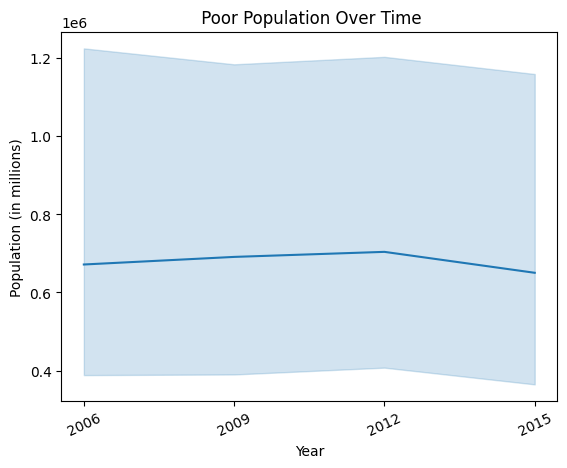

In [ ]:
import seaborn as sns 
data = magnitude[magnitude['adm_level'] == 'Country']
sns.lineplot(x='Year',y='Magnitude of Poor Population',data=magnitude)
plt.ylabel('Population (in millions)')
plt.title(" Poor Population Over Time")
plt.xticks(np.arange(min(year), max(year)+1, 3.0), rotation = 25)
plt.show()

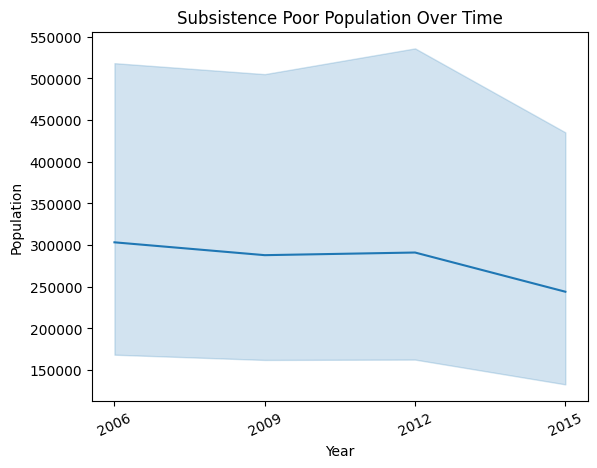

In [ ]:
data = magnitude[magnitude['adm_level'] == 'Country']
sns.lineplot(x='Year',y='Magnitude of Subsistence Poor Population',data=magnitude)
plt.ylabel('Population')
plt.title("Subsistence Poor Population Over Time")
plt.xticks(np.arange(min(year), max(year)+1, 3.0), rotation = 25)
plt.show()

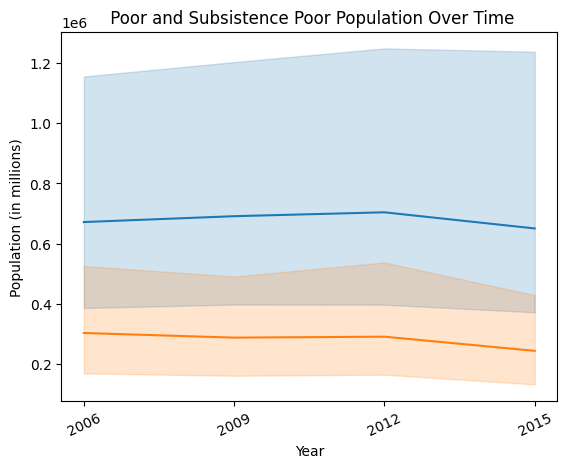

In [ ]:
import seaborn as sns 
sns.lineplot(x='Year',y='Magnitude of Poor Population',data=magnitude)
sns.lineplot(x='Year',y='Magnitude of Subsistence Poor Population',data=magnitude)
plt.ylabel('Population (in millions)')
plt.title(" Poor and Subsistence Poor Population Over Time")
plt.xticks(np.arange(min(year), max(year)+1, 3.0), rotation = 25)
plt.show()

###Normality Test (Kolmogorov Smirnov)

Using Kolmogorov Smirnov test to determine whether the data is normally distributed or not

In [ ]:
from scipy.stats import kstest
stat,p = kstest(magnitude['Magnitude of Poor Population'], 'norm')
print(f"stat = {stat:.3f}, p = {p:.3f}")
if p > 0.05:
  print("Normally Distributed")
else:
  print("Not Normally Distributed")

stat = 0.998, p = 0.000
Not Normally Distributed


In [ ]:
stat,p = kstest(magnitude['Magnitude of Subsistence Poor Population'], 'norm')
print(f"stat = {stat:.3f}, p = {p:.3f}")
if p > 0.05:
  print("Normally Distributed")
else:
  print("Not Normally Distributed")

stat = 0.975, p = 0.000
Not Normally Distributed


###Determine if there is a significant change in population over time (Kruskal Wallis) 

We want to determine if the change in population value is significant throughout the years considered. 

Since the dataset has a non-normal distribution, a non-parametric Kruskal Wallis test will be employed. 

###Hypothesis Testing

Ho : There is no significant difference in the magnitude of poor population between the years 2006, 2009, 2012, and 2015.  </br> 

Ha: There is a significant difference in the magnitude of poor population between the years 2006, 2009, 2012, and 2015. 

In [ ]:
from scipy.stats import kruskal
stat,p = kruskal(*[magnitude['Magnitude of Poor Population'].values 
                   for value, year in magnitude.groupby('Year')])
print(f"stat = {stat:.3f}, p = {p:.3f}")
if p > 0.05:
  print("There is no significant change in the poor population over time. ")
else:
  print("There is a significant change in the poor population over time. ")

stat = 0.000, p = 1.000
There is no significant change in the poor population over time. 


Ho : There is no significant difference in the magnitude of subsistence poor population between the years 2006, 2009, 2012, and 2015.  </br> 

Ha: There is a significant difference in the magnitude of subsistence poor population between the years 2006, 2009, 2012, and 2015. 

In [ ]:
from scipy.stats import kruskal
stat,p = kruskal(*[magnitude['Magnitude of Subsistence Poor Population'].values 
                   for value, year in magnitude.groupby('Year')])
print(f"stat = {stat:.3f}, p = {p:.3f}")
if p > 0.05:
  print("There is no significant change in the  subsistence poor population over time. ")
else:
  print("There is a significant change in the subsistence poor population over time. ")

stat = 0.000, p = 1.000
There is no significant change in the subsistence poor population over time. 


###Interpretation

The Kruskal Wallis Test shows that the p-value is greater than the alpha = 0.05 for both tests. Hence, we fail to reject the null hypotheses at a significance level of 5%. This implies that there is no significant change in the magnitude of poor population between the years 2006, 2009, 2012, and 2015. The same statement can be said on the magnitude of subsistence poor population. 

###Correlation Analysis (Spearman rho)

Since both columns are not normally distributed, a nonparametric correlation test or the Spearman Rho test will be employed. </br>

We test our claim stating that there is a significant positive correlation between magnitude of poor population and subsistence poor population since the latter is an extension of the second variable incorporating non-essential requirements for living. 

In [ ]:
from scipy.stats import spearmanr
coef,p =spearmanr(magnitude['Magnitude of Poor Population'],magnitude['Magnitude of Subsistence Poor Population'])
alpha = 0.5
print(f'Spearman correlation coefficient is {coef:.2f}')
if p > alpha:
  print(f'There is no significant correlation between the columns (p = {p}) ')
else: 
  print(f'There is a significant correlation between the columns (p = {p})')

Spearman correlation coefficient is 0.96
There is a significant correlation between the columns (p = 8.546803329972053e-215)


The spearman rho analysis shows that there is a significant relationship between the magnitude of poor population and subsistence poor population (p=0.000). The correlation coefficient of 0.96 demonstrates that there is a strong positive association between the two variables. This implies that when the number of individuals within a population that fall below the poverty line increases, the number of individuals within a population who are living in subsistence poverty escalates. 

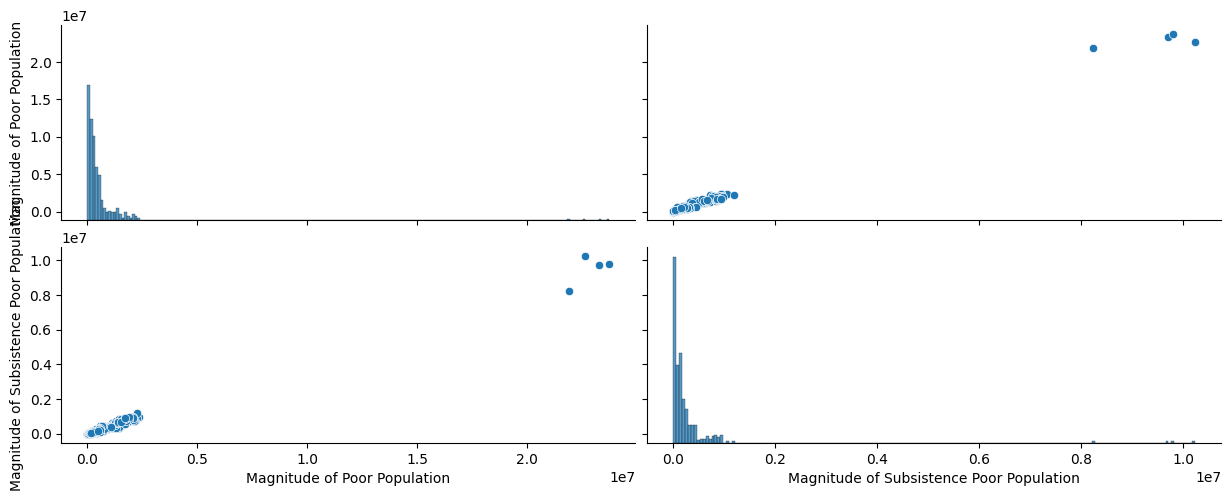

In [ ]:
import seaborn as sns

sns.pairplot(magnitude[['Magnitude of Poor Population','Magnitude of Subsistence Poor Population']], 
            diag_kind = 'hist',height = 2.5,aspect =2.5)
plt.show()

More focused visualization using `jointplot` in seaborn

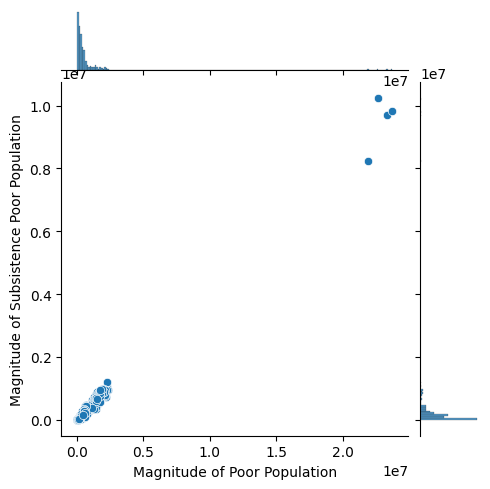

In [ ]:
import seaborn as sns

sns.jointplot(data = magnitude, x= "Magnitude of Poor Population",y="Magnitude of Subsistence Poor Population", 
              height =5)
plt.show()